In [67]:
import numpy as np
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [68]:
# Output dataframes instead of arrays
set_config(transform_output="pandas")

# Load in our data using pandas read csv function
penguins = pd.read_csv("dataset/penguins.csv")
penguins

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190
...,...,...
337,55.8,207
338,43.5,202
339,49.6,193
340,50.8,210


In [69]:
# Look at max and min values

penguins.agg(['min', 'max'])

,bill_length_mm,flipper_length_mm
min,32.1,172
max,59.6,231


In [70]:
# Need to standardize data before clustering.  Will start by making a copy.

penguins_copy = penguins.copy()

In [71]:
# Use standard scalar to get z score.  

scaler = StandardScaler() #Initialize standard scaler
standardized_penguins = scaler.fit_transform(penguins_copy)
standardized_penguins



,bill_length_mm,flipper_length_mm
0,-0.884499,-1.418347
1,-0.811126,-1.062250
2,-0.664380,-0.421277
3,-1.324737,-0.563715
4,-0.847812,-0.777373
...,...,...
337,2.178824,0.433355
338,-0.077396,0.077258
339,1.041543,-0.563715
340,1.261662,0.647013


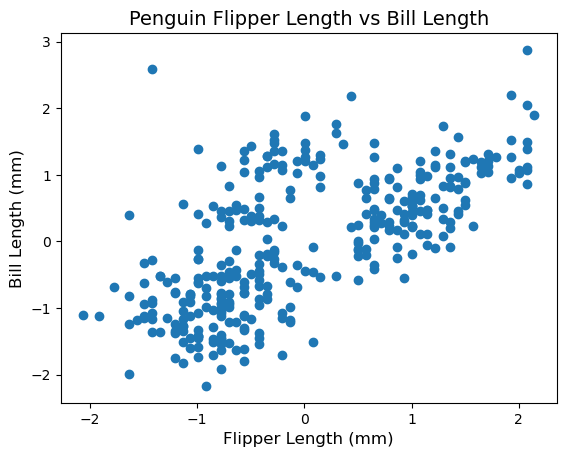

In [72]:
# Can we detect any subtypes or groupings through visualization?

# Scatter plot for bill_length_mm vs flipper_length_mm
plt.scatter(standardized_penguins['flipper_length_mm'], standardized_penguins['bill_length_mm'])

# Adding labels and title
plt.title('Penguin Flipper Length vs Bill Length', fontsize=14)
plt.ylabel('Bill Length (mm)', fontsize=12)
plt.xlabel('Flipper Length (mm)', fontsize=12)

# Display the plot
plt.show()

In [73]:
# Perform k-means clustering
kmeans = KMeans(n_clusters = 5, random_state = 123, n_init = 10) # Initialize model and specify random state.  

# Because of n_init = 10, will run model 10 different times and keep lowest inertia.  Default is 10.

In [74]:
clusters = kmeans.fit(standardized_penguins)

In [75]:
clusters.labels_

# Five cluster solution.

array([1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 2, 1, 4, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1,
       1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2,
       3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 3, 3, 0, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2,
       3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 4, 0, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0,

In [76]:
standardized_penguins_with_clusters = standardized_penguins.copy()

In [77]:
standardized_penguins_with_clusters['Cluster'] = clusters.labels_

In [78]:
standardized_penguins_with_clusters

,bill_length_mm,flipper_length_mm,Cluster
0,-0.884499,-1.418347,1
1,-0.811126,-1.062250,1
2,-0.664380,-0.421277,4
3,-1.324737,-0.563715,1
4,-0.847812,-0.777373,1
...,...,...,...
337,2.178824,0.433355,0
338,-0.077396,0.077258,4
339,1.041543,-0.563715,0
340,1.261662,0.647013,0


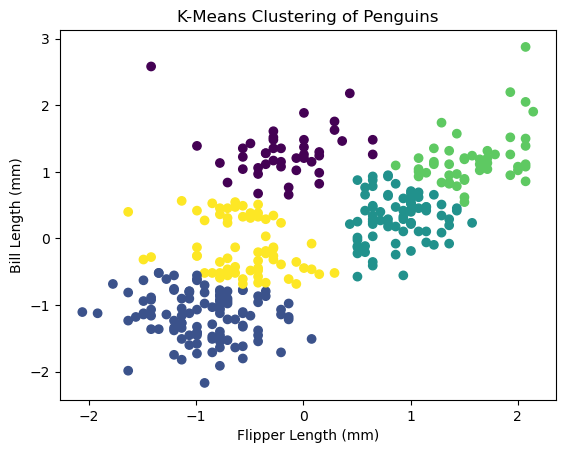

In [79]:
# Visualize clusters

# Plot the clusters
plt.scatter(standardized_penguins_with_clusters['flipper_length_mm'], standardized_penguins_with_clusters['bill_length_mm'], c=standardized_penguins_with_clusters['Cluster'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.title('K-Means Clustering of Penguins')
plt.show()

In [80]:
# We arbitrarily chose k = 5 to start.  Will need to determine optimal value of k.  Need to use elbow plot of WSSD vs. k

clusters.inertia_

# Inertia is sum of total WSSD across all clusters for model with k means 5 clusters.  Tells us how tightly points are clustered around their centroid.
# inertia = sum(WSSD for each cluster), across all five clusters.



91.47610853298526

In [81]:
# find optimal value of k

penguin_clust_ks = pd.DataFrame(columns = ['k', 'wssd'])
penguin_clust_ks

,k,wssd


In [82]:
# specify range

for k in range(1, 11):
    kmeans = KMeans(n_clusters= k, random_state=123)
    kmeans.fit(standardized_penguins)
    current_k = pd.DataFrame({'k': [k], 'wssd': [kmeans.inertia_]})
    penguin_clust_ks = pd.concat([penguin_clust_ks, current_k], ignore_index= True)  # avoid duplicates in index values.

    # Previous versions of pandas may have used append instead of concat.


/var/folders/lk/v5dfvh9d0799xjl8_99hhnhw0000gn/T/ipykernel_15379/3295732614.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  penguin_clust_ks = pd.concat([penguin_clust_ks, current_k], ignore_index= True)  # avoid duplicates in index values.


In [83]:
penguin_clust_ks

,k,wssd
0,1,684.000000
1,2,247.016625
2,3,157.815322
3,4,128.451298
4,5,94.061233
5,6,79.419564
6,7,69.965331
7,8,60.616734
8,9,55.030936
9,10,52.111475


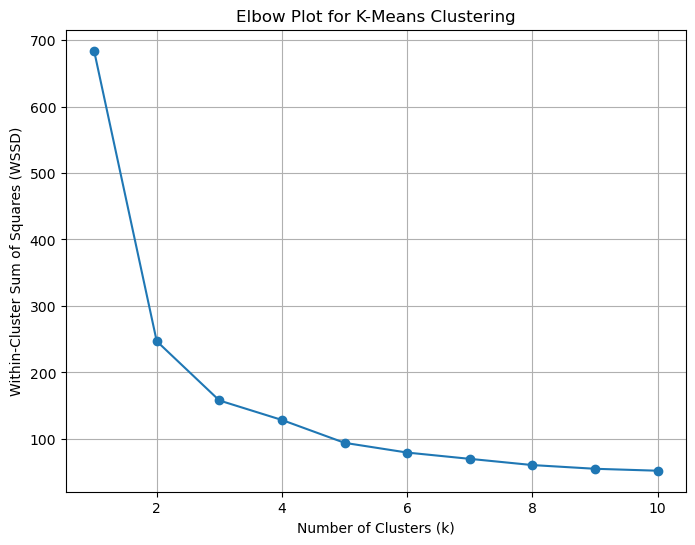

In [84]:
# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(penguin_clust_ks['k'], penguin_clust_ks['wssd'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Plot for K-Means Clustering')
#plt.xticks(penguin_clust_ks['k'])  # Optional: to ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

In [93]:
# To get the individual WSSD per cluster, you can use the labels and cluster centers from the fitted model. This is not built in though.

kmeans.n_clusters

10

In [107]:

centroids = kmeans.cluster_centers_

In [103]:
centroids

array([[ 0.97955518,  1.12344509],
       [-0.62468612, -0.7820432 ],
       [ 0.30241757,  1.15392637],
       [ 1.33255594, -0.20184426],
       [-1.23443155, -1.30512625],
       [-1.40197154, -0.5918281 ],
       [ 0.34021905, -0.59457691],
       [-0.33332769,  0.35196131],
       [ 1.37172126,  1.82344972],
       [ 0.43409888,  0.69083989]])

In [117]:
kmeans.labels_

array([4, 1, 1, 5, 1, 4, 1, 5, 1, 4, 4, 1, 1, 5, 4, 5, 1, 4, 6, 4, 4, 5,
       4, 4, 5, 1, 1, 4, 4, 4, 4, 1, 1, 5, 1, 1, 1, 4, 1, 4, 1, 4, 6, 4,
       1, 1, 4, 5, 1, 1, 1, 5, 7, 5, 1, 1, 1, 4, 5, 4, 1, 4, 1, 4, 1, 5,
       1, 5, 7, 5, 1, 1, 6, 5, 1, 1, 4, 4, 1, 5, 6, 4, 5, 5, 1, 5, 5, 1,
       1, 5, 7, 4, 1, 4, 7, 5, 1, 4, 6, 5, 7, 4, 5, 5, 1, 5, 5, 4, 6, 5,
       6, 1, 1, 1, 1, 1, 5, 5, 1, 4, 5, 4, 7, 4, 7, 1, 1, 1, 9, 1, 6, 5,
       5, 4, 1, 5, 7, 4, 1, 1, 1, 5, 1, 5, 4, 1, 4, 5, 5, 4, 7, 9, 8, 9,
       0, 0, 9, 9, 2, 7, 2, 7, 0, 2, 0, 9, 0, 7, 0, 9, 0, 0, 2, 9, 2, 2,
       2, 2, 0, 9, 0, 2, 7, 9, 8, 0, 0, 7, 2, 7, 9, 7, 8, 9, 0, 8, 2, 9,
       8, 9, 2, 9, 0, 9, 8, 2, 2, 7, 2, 7, 8, 9, 2, 2, 8, 2, 8, 9, 8, 2,
       8, 0, 2, 0, 2, 2, 8, 9, 0, 2, 2, 0, 8, 9, 8, 9, 8, 2, 0, 9, 8, 0,
       8, 9, 8, 2, 8, 0, 2, 3, 8, 0, 8, 2, 8, 2, 2, 7, 8, 7, 9, 0, 8, 2,
       8, 2, 8, 2, 0, 9, 2, 8, 9, 0, 6, 3, 3, 6, 3, 6, 6, 3, 6, 3, 6, 3,
       6, 3, 6, 3, 3, 3, 6, 3, 1, 6, 1, 3, 6, 3, 3,

In [118]:
kmeans.inertia_

52.11147457002744

In [111]:
output = pd.DataFrame(centroids, columns = ['coordinate_1', 'coordinate_2'])

In [113]:
output

,coordinate_1,coordinate_2
0,0.979555,1.123445
1,-0.624686,-0.782043
2,0.302418,1.153926
3,1.332556,-0.201844
4,-1.234432,-1.305126
5,-1.401972,-0.591828
6,0.340219,-0.594577
7,-0.333328,0.351961
8,1.371721,1.823450
9,0.434099,0.690840


In [ ]:
for k in range(kmeans.n_clusters):
    current_k = pd.DataFrame({'k': [k], 'wssd': [kmeans.inertia_]})
    
    output = pd.concat([output, current_k], ignore_index= True)



In [115]:
output

,coordinate_1,coordinate_2,k,wssd
0,0.979555,1.123445,NaN,NaN
1,-0.624686,-0.782043,NaN,NaN
2,0.302418,1.153926,NaN,NaN
3,1.332556,-0.201844,NaN,NaN
4,-1.234432,-1.305126,NaN,NaN
5,-1.401972,-0.591828,NaN,NaN
6,0.340219,-0.594577,NaN,NaN
7,-0.333328,0.351961,NaN,NaN
8,1.371721,1.823450,NaN,NaN
9,0.434099,0.690840,NaN,NaN
